---
# Chapter 2

## 1. Deeper understanding
- Variable Types (pp9)
    * categorical (qualitative)
    * numeric (quantitative)
    * ordered categorical (s, m, l, xl) <br/>
    Note for the ordered categorical, there is an ordering between the values, but no metric notation is appliable. For instance, the difference between s&m is not the same as that of m&l.
- Linear Regression v.s. k-nearest-neighbour (pp16)

| Property        | Linear Regression           | KNN  |
| ------ |----------| -----|
| assumption      | strict: a linear db is proper | mild |
| stable or not      |   stable    |  unstable: <br/> any subregion of the db depends on a handful of input points |
| bias | high| low|
| variance |  low     |   high  |

- Linear Regression and KNN are the most basic procedures and they are fundanmental to many other most popular techniques in use today.

- $L1$ criteria have discontinuities in their derivatives, which have hindered their widespread use. Squared error is analytically convenient and the most popular

## 1.1 $k$-nearest-neighbour
- Usage: Both classification and regression
- Deterministic model
- Effectiveness: 
> Despite its simplicity, k-nearest-neighbors has been successful in a large number of classification problems, including handwritten digits, satellite image scenes and EKG patterns. It is often successful where each class has many possible prototypes, and the decision boundary is very irregular (ESL pp.465). 


### `Algorithm Overview`
**Input** 
- Training data $T=\{(x_1, y_1),...(x_N,y_N)\}$, where $x_i \in \mathcal{X} \subseteq \mathbb{R}^n$, and $y_i \in \mathcal{y} = {c_1,c_2,...c_K}$ are the classes
- Input example $x$

**Output**
- The class that $x$ belongs to.

**Algorithm**

(1). For a input $x$, get its $k$ nearest neighbours with certain distance measures. Denote the set of its $k$ nearest neighbours as $N_k(x)$.

(2). Make prediction according to the classes of $N_k(x)$ with a certain decision strategy, for example, the majority vote: 
$$\hat{y} = arg \max\limits_{c_j} \sum_{x_i \in N_k(x)}I(y_i=c_j) \quad \quad i=1,2,..N; j=1,2,..K
\label{eq:mv} \tag{1}$$, where $I()$ is an idendity function:
  \begin{equation}
    I(y_i=c_j)=
    \begin{cases}
      1, & \text{if}\ y_i==c_j \\
      0, & y_i \neq c_j
    \end{cases}
  \end{equation}
  
### `3 Elements`
- $k$
- distance measure
- decision strategy in the classification

### `Choice of k`
If the neighbourhoods are nonoverlapping, there would be $\frac{N}{k}$ neighbourhoods. For each neighbourhood, we fit one parameter for it. Thus, the effective number of parameters of $k$-NN is $\frac{N}{k}$.

- Two extreme case:<br/>
    * **k=1**
        The error on the training data will be 0. <br/>
        Complex model, low bias, high variance
    * **k=N**
        For any input $x$, $\hat{y}$ would be always be the most common class in the training examples.<br/>
        Simple model, high bias
- We usually choose a small $k$.
- Cross validation can help to choose an optimal $k$.

### `Distance Measurement`
- Mostly used L2 distance (Euclidean distance): For two vectors $\mathbf{x_i}$ and $\mathbf{x_j}$, where $x_i=(x_i^{(1)}, x_i^{(2)}, \ldots, x_i^{(L)})$, L2 distance between them is:
$$L_2(x_i,x_j)= \Big(\sum_{l=1}^L |x_i^{(l)}-x_j^{(l)}|^2\Big)^{1/2}$$
- Others include L1 distance.

### `Decision strategy`
- Widely used is "majority vote", see Eq. $\eqref{eq:mv}$

### `Computation of nearest neighbors`
Fast computation of nearest neighbors is an active area of research in machine learning. 

### `1. brute-force (linear scan)`
The most straightforward approach involves the brute-force computation of distances between all pairs of points in the dataset (also known as "linear scan"): for $N$ samples in $D$ dimensions, its time complexity is $O(DN^2)$. As $N$ grows, the brute-force approach quickly becomes infeasible. 
- query time grows as $O(DN)$, not related to number of neighors $k$

### `2. kd tree - k-dimensional tree`

- idea: reduce the distance calculation times: find a way to know points A and C are very distant, without having to explicitly calculate their distance.
- CORE of kd tree: **partition the parameter space along the data axes**
- kd tree construction is very fast: : because partitioning is performed only along the data axes, no $D$ dimensional distances need to be computed. 
- disadvantage: “curse of dimensionality”, inefficient when $D$ is large
- Query time: KD tree query time changes with $D$. 
    * For small $D$, (less than 20 or so) the cost is approximately $O[D\log(N)]$, and the KD tree query can be very efficient. 
    * For larger $D$, the cost increases to nearly $O[DN]$ and the overhead due to the tree structure can lead to queries which are slower than brute force.
    
### `3. Ball tree`
- CORE of ball tree: **partition data in a series of nesting hyper-spheres**
- construction is more coslty than kd-tree
- effective for high-dimensional data
- query time grows as approximately $O[D\log(N)]$

Brute force query time is unchanged by data structure and number of neighbors $k$. <br/>
Both the query times of kd tree and ball tree can be greatly influenced by data structure. And the tree-based arrpoaches' query time will become slower as $k$ increases. This is due to two effects: first, a larger $k$ leads to the necessity to search a larger portion of the parameter space. Second, using $k>1$ requires internal queueing of results as the tree is traversed.

**Data structure**: **intrinsic dimensionality** of the data and/or **sparsity** of the data. 
- *Intrinsic dimensionality* refers to the dimension $d \leq D$ of a manifold on which the data lies, which can be linearly or non-linearly embedded in the parameter space. 
- *Sparsity* refers to the degree to which the data fills the parameter space (this is to be distinguished from the concept as used in “sparse” matrices. The data matrix may have no zero entries, but the structure can still be “sparse” in this sense).

Ball tree and KD tree query times can be greatly influenced by data structure. In general, <u>sparser data with a smaller intrinsic dimensionality leads to faster query times</u>. Because the KD tree internal representation is aligned with the parameter axes, it will not generally show as much improvement as ball tree for arbitrarily structured data.

**Datasets used in machine learning tend to be very structured, and are very well-suited for tree-based queries.**

### `Summary`
- For small sample sizes (training size < 30), a brute force search can be more efficient than a tree-based query.
- As $k$ becomes large compared to $N$ ($k>=N/2$), the ability to prune branches in a tree-based query is reduced. In this situation, brute force queries can be more efficient.
- If very few query points will be required, brute force is better than a tree-based method.

### `Questions?????????????????`

- `leaf_size` in [sklearn.neighbors.KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree)

### `Implementation of KNN`

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # only take two features
y = iris.target

xx shape (220, 280)
xx.ravel() shape (61600,)


Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'distance')")

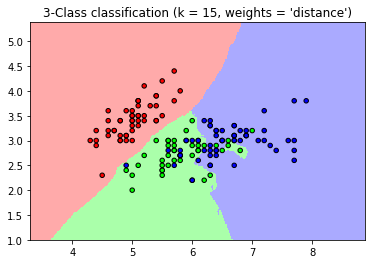

In [18]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# create a KNN classifier
n_neighbors = 15
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X,y)

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # step size in the meshgrid plotting
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
print('xx shape', xx.shape)
print('xx.ravel() shape', xx.ravel().shape)

# make predictions
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

In [19]:
clf.score(X,y)

0.9266666666666666

## 2. Have not understand??????????

- [Checked] pp11, "huge assumption about structure" V.S. "very mild structural assumptions". **What is an assumption's structure? What does huge or mild mean here?**<br/>
    * It (Linear regression) does appear to <u>rely heavily on the assumption that a linear decision boundary is appropriate</u>. So huge assumption about the structure means "strict assumption". <br/>
    * While the k-nearest-neighbor procedures <u>do not appear to rely on any stringent assumptions about the underlying data</u>, and can adapt to any situation. In this setting, the assumptions about structure are mild.
- pp12, **hyperplane**?
- pp12, How to solove the Residual Sum of Squares in Linear Regression? <br/>
$RSS(\beta)=\sum_i^N(y_i - x_i^T\beta)^2 = (\textbf{y}-\textbf{X}\beta)^T(\textbf{y}-\textbf{X}\beta)$ <br/> **How to differetiate this w.r.t. $\beta$?** This is how we get the *normal equation* solution for linear regression. 
- pp18, Statistical Decision Theory. The whole section is not very clear to you.

# 3. Something to be studied
- **Gaussian Model**: bivariate Gaussian distributions, a mixture of 10 low-variate Gaussians
- **Voronoi tessellation**